In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
df["country"].value_counts()

,count
country,
USA,4600


In [7]:
df.drop(columns=['country'], inplace=True)

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [9]:
df.drop(columns=['statezip'], inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
df['city'] = encode.fit_transform(df['city'])

In [16]:
print(encode.inverse_transform(np.arange(1,36)))
df['city'].value_counts()

['Auburn' 'Beaux Arts Village' 'Bellevue' 'Black Diamond' 'Bothell'
 'Burien' 'Carnation' 'Clyde Hill' 'Covington' 'Des Moines' 'Duvall'
 'Enumclaw' 'Fall City' 'Federal Way' 'Inglewood-Finn Hill' 'Issaquah'
 'Kenmore' 'Kent' 'Kirkland' 'Lake Forest Park' 'Maple Valley' 'Medina'
 'Mercer Island' 'Milton' 'Newcastle' 'Normandy Park' 'North Bend'
 'Pacific' 'Preston' 'Ravensdale' 'Redmond' 'Renton' 'Sammamish' 'SeaTac'
 'Seattle']


,count
city,
35,1573
32,293
3,286
31,235
16,187
19,187
18,185
1,176
33,175


In [17]:
df.drop(columns=['date'], inplace=True)

In [18]:
df['price'] = df['price'].astype(int)


In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,313000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,36
1,2384000,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,35
2,342000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,18
3,420000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,3
4,550000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,31


In [23]:
df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,36
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,35
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,18
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,3
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,31


In [27]:
df.drop(columns=['street']).corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
price,1.000000,0.200336,0.317229,0.430410,0.050451,0.137125,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,0.018625
bedrooms,0.200336,1.000000,0.498491,0.594884,0.068819,0.157433,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082,-0.130447
bathrooms,0.317229,0.498491,1.000000,0.711253,0.109521,0.463729,0.071806,0.203389,-0.118819,0.649091,0.270301,0.394516,-0.185970,-0.069532
sqft_living,0.430410,0.594884,0.711253,1.000000,0.210538,0.340993,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,-0.109686
sqft_lot,0.050451,0.068819,0.109521,0.210538,1.000000,-0.005114,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,-0.079135
floors,0.137125,0.157433,0.463729,0.340993,-0.005114,1.000000,0.017955,0.021116,-0.306464,0.517319,-0.253308,0.562218,-0.247150,0.035746
waterfront,0.135648,-0.003483,0.071806,0.117616,0.017241,0.017955,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,0.001450
view,0.228504,0.111028,0.203389,0.311009,0.073907,0.021116,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,0.001340
condition,0.034915,0.025080,-0.118819,-0.062826,0.000558,-0.306464,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,-0.010592
sqft_above,0.367570,0.484705,0.649091,0.876443,0.216455,0.517319,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426,-0.121701


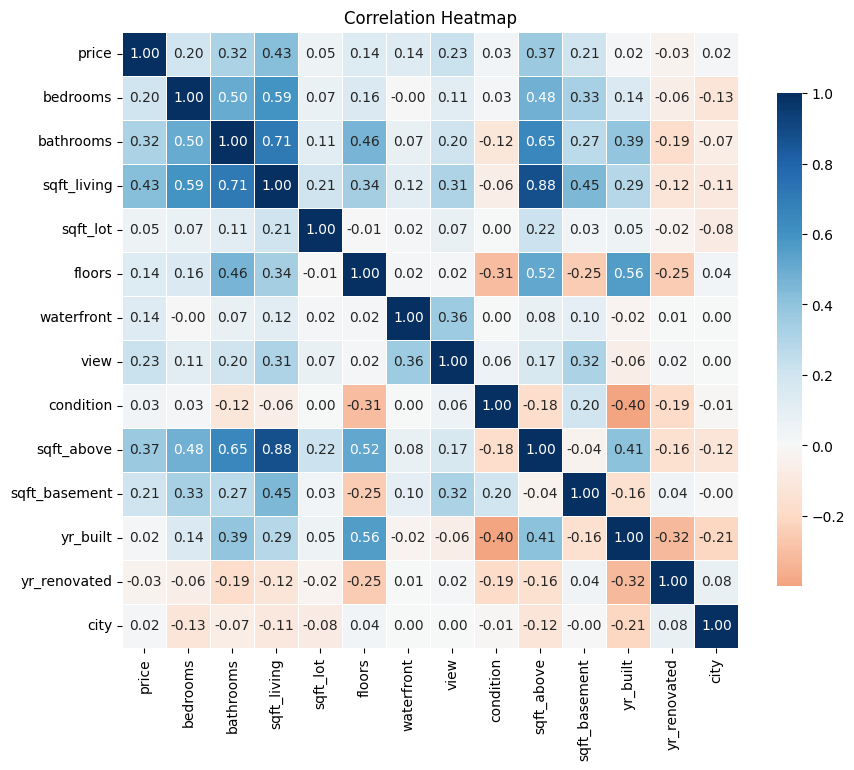

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.drop(columns=['street']).corr()

cmap = sns.color_palette("RdBu", as_cmap=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=cmap, center=0,
            cbar_kws={"shrink": .8}, square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,36
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,35
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,18
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,3
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,31


In [34]:
df.to_csv('house_dataset.csv', index=False)